# 과제 1-3: 판다스 데이터 다루기
---
박정현(pwjdgus1017@donga.ac.kr), 배정훈(rhenus9911@gmail.com), 최재혁(fkdlfkdl68@donga.ac.kr), 권건우(a71463092@gmail.com)
정답 작성: 김민석
---
우리는 관계 강의를 통해 그래프에 대한 구성을 이론적으로 학습하였다. 구체적으로, 유향/무향 그래프 및 관계행렬 등을 그래프 표현으로 배웠다. 하지만, 강의에서 학습한 데이터는 단순한 숫자(1,2,3,..)/문자형(a,b,c,..)이었기 때문에 실제 세계에서 적용하기는 어렵다.

본 프로그래밍 과정을 통해, 실제 데이터를 어떻게 그래프 모델로 표현하고, 또한 그래프의 이론적인 방법을 실용적으로 어떻게 응용하는지에 대해서 배울 예정이다.

데이터셋1 폴더에서 다음 데이터셋을 다운로드 받아서, 업로드하고 프로그램 수행하시기 바랍니다.

- 부산교통공사_시간대별 승하차인원_20210801


In [1]:
import pandas as pd 

df=pd.read_csv('/content/부산교통공사_시간대별 승하차인원_20210801.csv', encoding='cp949')
df.head(5)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2021-01-01,승차,2323,0,0,1,4,24,42,101,122,94,109,148,143,163,229,308,272,237,132,59,53,55,20,7,0
1,95,다대포해수욕장,2021-01-01,하차,2010,0,0,1,1,26,88,112,54,66,99,123,136,226,248,199,160,158,76,71,41,57,34,21,13
2,95,다대포해수욕장,2021-01-02,승차,2901,0,0,0,4,34,43,79,139,173,173,197,207,249,296,386,288,264,123,72,83,64,26,1,0
3,95,다대포해수욕장,2021-01-02,하차,2363,0,0,0,0,14,48,61,78,73,129,206,209,222,265,264,223,165,104,62,78,81,48,20,13
4,95,다대포해수욕장,2021-01-03,승차,2268,0,0,2,5,22,43,49,104,125,117,157,154,198,249,337,239,182,91,63,57,43,25,6,0


# HW1. 판다스(pandas)의 데이터프레임(Dataframe) 다루기 


본 과제는 판다스의 데이터 프레임을 조직을 목표합니다.
csv,json 파일 읽기, 필요 데이터 추출 및 필터, 그룹화 및 통계 계산하기를 학습할 예정입니다.

```각 과제는 아래 세부 과제들로 구성됩니다,```

## ■ 문제 1-1. 데이터 프레임의 레코드 수를 출력할 것.
데이터 프레임의 레코드 수(Row의 수)와 필드 수(Column)를 각각 출력하여라
```
데이터프레임의 __shape__ 메소드는 데이터의 차원을 표현합니다

참조: https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.shape.html`
```

```


In [2]:
#2차원 행렬로 구성된 데이터 프레임의 크기 출력
df.shape

(54432, 29)

In [3]:
#행
df.shape[0]

54432

In [4]:
#열
df.shape[1]

29

## ■ 문제 1-2. 데이터프레임의 표현적인 통계(descriptive statistics) 보기
주어진 데이터프레임의 표현적인 통계를 출력하시오 

```
Descriptive statistics이란? 데이터의 분포의 모양, 퍼짐 정도, 중앙에 몰리는 정도. 최대, 최소값, 평균 을 한눈에 보여주도록 합니다.

참조 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
```


In [5]:
# 데이터프레임에 대한 표현적인 통계를 출력하시오
df.describe()

,역번호,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
count,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000,54432.000000
mean,217.696429,6001.938125,0.176146,0.167659,0.118386,1.766093,60.352568,138.390414,303.107529,544.682650,361.287349,323.543210,342.298979,363.079292,382.208407,376.746858,394.491145,428.293283,496.812812,583.616898,298.578759,211.858098,181.392802,135.147762,62.917604,10.903421
std,96.589932,4817.111320,0.812027,1.245476,3.069415,4.834943,54.239414,104.622347,267.770210,530.095992,331.195661,272.636397,297.848738,321.347636,342.717366,339.763729,350.070443,369.656160,431.662020,576.509050,284.804430,221.292111,190.983476,153.573710,72.383265,14.248733
min,95.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.750000,2628.000000,0.000000,0.000000,0.000000,0.000000,19.000000,65.000000,104.000000,181.750000,145.000000,144.000000,152.000000,157.000000,165.000000,159.000000,169.000000,185.000000,203.000000,194.000000,103.000000,75.000000,59.000000,40.000000,19.000000,2.000000
50%,216.500000,4486.500000,0.000000,0.000000,0.000000,0.000000,45.000000,114.000000,220.000000,379.000000,270.000000,240.000000,248.000000,261.000000,272.000000,263.000000,275.000000,306.000000,360.000000,399.000000,210.000000,148.000000,129.000000,92.000000,43.000000,6.000000
75%,302.250000,8083.000000,0.000000,0.000000,0.000000,2.000000,89.000000,183.000000,423.000000,703.000000,467.000000,428.000000,445.000000,474.000000,495.000000,487.000000,509.000000,560.000000,649.000000,763.000000,397.000000,270.000000,236.000000,177.000000,84.000000,14.000000
max,414.000000,42783.000000,62.000000,166.000000,700.000000,633.000000,420.000000,938.000000,1473.000000,4228.000000,3098.000000,2470.000000,4396.000000,5485.000000,5499.000000,5449.000000,5534.000000,3203.000000,3887.000000,5507.000000,2767.000000,2634.000000,2584.000000,2648.000000,1870.000000,178.000000


## ■ 문제 1-3. 데이터프레임의 하위 n개 출력
주어진 데이터프레임의 하위 n개의 데이터를 출력하여라

In [6]:
n=5
df.tail(n)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
54427,414,안 평,2021-08-29,하차,1141,0,0,0,0,1,80,59,65,63,88,76,81,89,66,80,75,94,60,47,44,33,25,10,5
54428,414,안 평,2021-08-30,승차,1946,0,0,0,4,37,82,194,161,155,127,118,115,128,107,135,130,172,157,59,32,18,13,2,0
54429,414,안 평,2021-08-30,하차,1892,0,0,0,0,2,102,88,158,89,102,122,105,103,101,128,129,173,195,121,78,41,31,15,9
54430,414,안 평,2021-08-31,승차,1862,0,0,0,8,38,93,193,176,130,118,107,98,99,134,97,176,168,124,46,29,17,9,2,0
54431,414,안 평,2021-08-31,하차,1800,0,0,0,0,2,99,86,153,85,84,108,111,108,90,100,106,157,195,116,84,52,42,10,12


## ■ 문제 1-4. 데이터프레임 내 특정 필트(COLUMN) 및 특정 레코드(ROW) 선택하기 (2문제)
1) 데이터프레임 내 __역번호__,__역명__ ,__구분__,__08시-09시__ 필드만 선택하고
2) 위의 데이터에서 30000-39999번째 레코드(총 1만개)만 가져와서 저장할 것

변수명은 df_sub 로 저장하시오

참고로 30000번째 데이터는 '동의대' 역명을 포함한다

```
참조: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
```

In [7]:
df_sub=df[['역번호','역명','구분','08시-09시']]

In [8]:
df_sub=df_sub[30000:40000]

In [9]:
df_sub

,역번호,역명,구분,08시-09시
30000,222,동의대,승차,168
30001,222,동의대,하차,101
30002,222,동의대,승차,603
30003,222,동의대,하차,426
30004,222,동의대,승차,612
...,...,...,...,...
39995,243,양 산,하차,223
39996,243,양 산,승차,155
39997,243,양 산,하차,142
39998,243,양 산,승차,503


## ■ 문제 1-5. 데이터프레임의 특정 필드에 따른 그룹화 및 평균 구하기
df_sub에서 승하차의 구분에 따른 평균을 구하여라.
df_sub에 재저장할 필요없으며, 계산된 역번호는 무시해도 된다 

```
참고: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
```

In [10]:
df_sub.groupby(['구분'],as_index=True).mean()

,역번호,08시-09시
구분,,
승차,232.5168,401.4302
하차,232.5168,385.2460


## ■ 문제 1-6 데이터프레임의 그룹함수 적용하기(최대, 최소, 평균 등)
승하차 중 최소/최대 인원을 갖는 데이터 구하기

최소: 1동래역이 최소인원 1명이다

최대: 화 명역은 08-09시에 4228명이 하차한다.

```
DataFrame을 데이터 그룹화 시키기 함수: groupby()
- Series의 데이터 그룹화 : 특정열 인덱싱.groupby(기준열 인덱싱)
- DataFrame의 데이터 그룹화 : df.groupby("기준이 될 컬럼명")를 통해 특정열이 아닌, df의 모든 열에 대해 계산
ex) grouped = df['index'].groupby(df['key']) = df['index']를 df['key']기준으로 데이터 그룹화시키고 그 결과를 grouped에 저장 
추가적으로, grouped.mean()을 적용하여 평균을 구할 수 있다.
```

In [11]:
grouped=df[['역번호','역명','구분','08시-09시']].groupby(['구분'])
# grouped=df.groupby(['구분'])

In [12]:
grouped.min()

,역번호,역명,08시-09시
구분,,,
승차,95,1동래,1
하차,95,1동래,1


In [13]:
grouped.max()

,역번호,역명,08시-09시
구분,,,
승차,414,화 명,2285
하차,414,화 명,4228


## ■ 문제 1-7 데이터프레임의 특정 값을 필터링 하기
df 데이터프레임으로부터 하단역(102)에 대한 승하차정보만 갖도록 필터링 하시오

꼭 역번호(102)로 검색하시고, df_hadan 으로 저장하면됩니다

df_hadan의 shape는 486 rows × 29 columns 입니다

```
특정 컬럼값을 만족하는 데이터프레임을 출력하기
df.loc[df['column_name'] == some_value]

```

In [14]:
df_hadan=df.loc[df['역번호']==102]

In [15]:
df_hadan

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
3402,102,하 단,2021-01-01,승차,5351,0,0,0,14,44,129,156,226,258,251,292,356,449,403,459,489,479,336,292,284,268,124,36,6
3403,102,하 단,2021-01-01,하차,5079,0,0,0,2,20,147,166,236,230,241,297,315,332,376,429,438,469,402,251,231,252,140,82,23
3404,102,하 단,2021-01-02,승차,8208,0,0,0,12,70,128,249,356,405,530,547,715,765,727,638,724,679,486,322,366,289,135,55,10
3405,102,하 단,2021-01-02,하차,7678,0,0,0,1,29,241,298,413,434,482,522,561,599,602,566,550,632,585,275,275,341,155,87,30
3406,102,하 단,2021-01-03,승차,5683,0,0,0,19,51,82,143,214,259,306,326,390,459,500,499,532,510,394,272,300,297,102,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,102,하 단,2021-08-29,하차,7949,0,6,0,0,41,232,242,326,420,426,480,520,508,552,628,691,604,615,452,417,422,215,122,30
3884,102,하 단,2021-08-30,승차,16281,0,0,0,21,138,472,1299,1552,913,869,896,841,870,896,913,1059,1508,1647,904,733,506,207,36,1
3885,102,하 단,2021-08-30,하차,14578,0,0,0,0,62,811,1278,1231,799,743,687,738,840,847,874,1024,1161,1479,768,437,374,256,140,29
3886,102,하 단,2021-08-31,승차,16087,0,12,10,33,122,428,1312,1592,947,851,759,858,839,811,840,1063,1506,1653,920,688,538,237,65,3


## ■ 문제 1-8 실제 데이터값에 기반한 서브데이터 추출(Boolean indexing)
두 가지 이상의 필터를 혼합하여 8-9시와 18시-19시에 각각 1000명이상, 2000이상 데이터만 추출하시오. 

참고로 __승차__한 데이터만 29건이 발생합니다.

```
cond_A = (df['column_name'] > 1000)
cond_B = (df['column_name'] > 2000)
df_hadan_sub1 = df_hadan.loc [cond_A & cond_B]

In [16]:
cond_A = (df['08시-09시'] > 1000)
cond_B = (df['18시-19시'] > 2000)
df_hadan_sub1 = df_hadan.loc [cond_A & cond_B]

In [17]:
df_hadan_sub1.shape

(29, 29)

# HW2. 논리식(Logic expression)에 대한 라이브러리 사용 및 Matplotlib를 사용한 데이터 시각화

pyprover는 first-order predicate logic에 대한 증명을 파이썬 라이브러리 입니다. 슬라이드 33페이지에 있는 추론에 대해서 설명합니다.
Matplotlib은 주로 2D 그래프 차트를 위한 패키지로, 출판물 수준의 그래프를 만들어내도록 지원합니다. pdf, svg, jpg 등의 벡터 및 레스터 포맷으로 출력이 가능합니다

In [18]:
!pip install pyprover
from pyprover import *

## ■ 문제 2-1. 전건 긍정 modus ponens

In [19]:
given=P&(P>>Q) # [P AND (P -> Q) ]->Q
conclu=Q
result=proves(given,conclu)
print(result)

True


## ■ 문제 2-2. 가언 삼단 논법 hypothetical syllogism

In [20]:
# 가언삼단 논법 P이면 Q이다
# Q이면 R이다
# 따라서 P이면 R이다.
# [(P->Q) & (Q->R) ]-> P->R

given=(P>>Q&Q>>R)
conclusion=P>>R
result=proves(given,conclusion)
print(result)

True


## ■ 문제 2-3. 술어 논리 predicate logic
TE는 Exist(∃x)를 의미하고 FA는 ForAll(∀x)를 의미하는 한정자이다. 이 한정자를 predicate logic(술어 로직)와 함께 사용하는 예제를 살펴보자. (본 예제는 실행하기만 하면 됩니다)
```
Statement: Not all students like homework
Negation: There is at leat one student who does not like homework
```

In [21]:
# x: students, P: isHomeworkLikable(x)
given = ~(FA(x, P(x))) # Not all students like homework
conclu = TE(x, ~P(x)) # There is at least one student who does not like homework
print("true") if proves( given, conclu ) else print("false")

true


Matplotlib 를 사용하기
Matplotlib는 그래프 차트등을 표현하는 저수준 라이브러리이다. 좀더 진보된 라이브러리를 원한다면, seaborn 등을 참고하면 좋다.

In [22]:
# Matplotlib 기본설정
!pip install -U pip
!pip install -U matplotlib

import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumBarunGothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [23]:
# x축설정
df_hadan.set_index(['구분','년월일'])

,,역번호,역명,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
구분,년월일,,,,,,,,,,,,,,,,,,,,,,,,,,,
승차,2021-01-01,102,하 단,5351,0,0,0,14,44,129,156,226,258,251,292,356,449,403,459,489,479,336,292,284,268,124,36,6
하차,2021-01-01,102,하 단,5079,0,0,0,2,20,147,166,236,230,241,297,315,332,376,429,438,469,402,251,231,252,140,82,23
승차,2021-01-02,102,하 단,8208,0,0,0,12,70,128,249,356,405,530,547,715,765,727,638,724,679,486,322,366,289,135,55,10
하차,2021-01-02,102,하 단,7678,0,0,0,1,29,241,298,413,434,482,522,561,599,602,566,550,632,585,275,275,341,155,87,30
승차,2021-01-03,102,하 단,5683,0,0,0,19,51,82,143,214,259,306,326,390,459,500,499,532,510,394,272,300,297,102,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
하차,2021-08-29,102,하 단,7949,0,6,0,0,41,232,242,326,420,426,480,520,508,552,628,691,604,615,452,417,422,215,122,30
승차,2021-08-30,102,하 단,16281,0,0,0,21,138,472,1299,1552,913,869,896,841,870,896,913,1059,1508,1647,904,733,506,207,36,1
하차,2021-08-30,102,하 단,14578,0,0,0,0,62,811,1278,1231,799,743,687,738,840,847,874,1024,1161,1479,768,437,374,256,140,29


<AxesSubplot:>

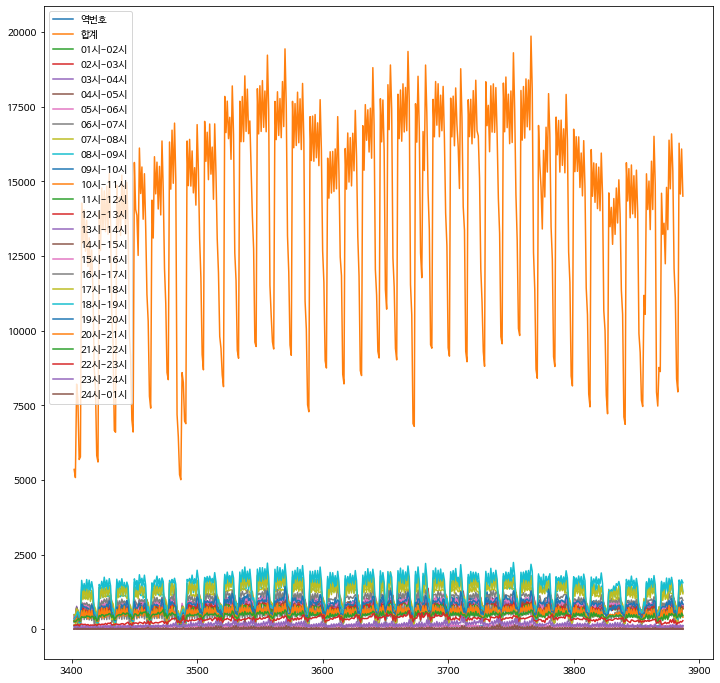

In [24]:
df_hadan.plot(figsize=(12,12))

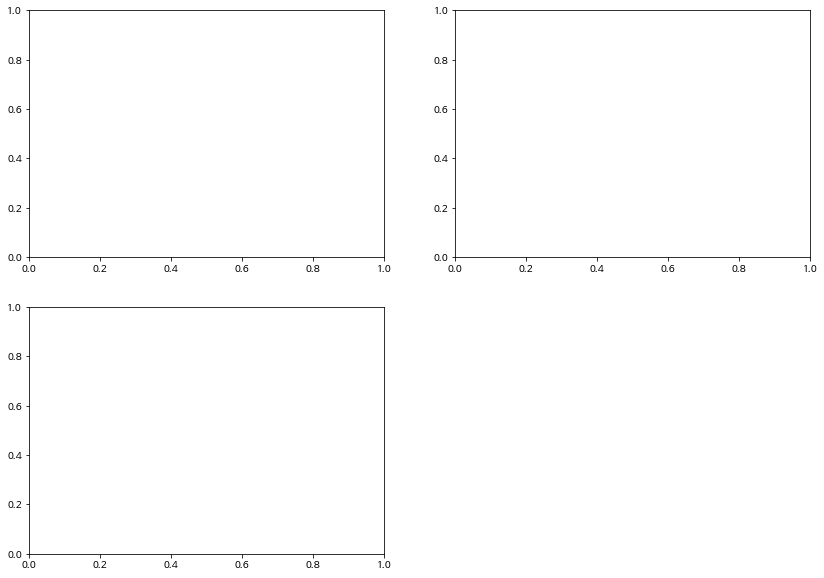

In [25]:
# 빈 3개의 그래프  
fig= plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


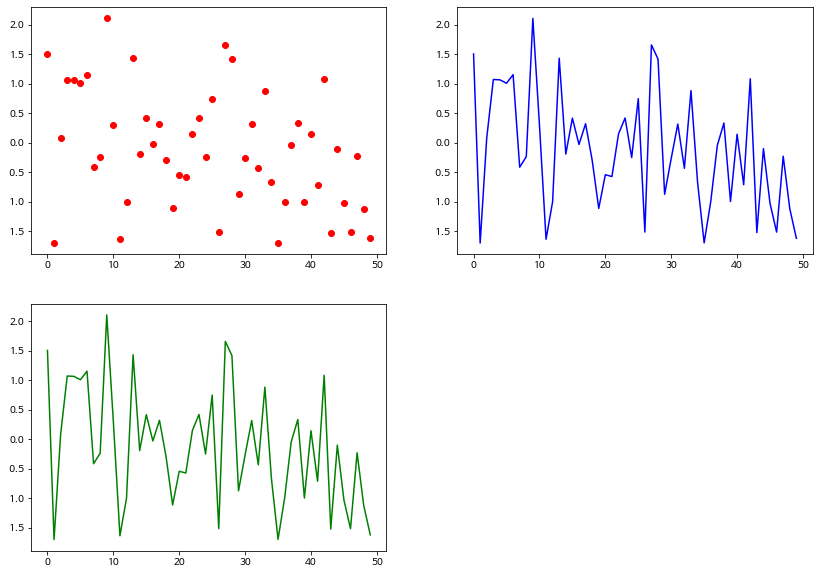

In [26]:
# 빈그래프의 채워넣기
x = np.arange(50)
y = np.random.randn(50)
ax1.plot(x,y,'ro')
ax2.plot(x,y,'b-')
ax3.plot(x, y,'g-')
fig

## ■ 문제 2-4 승,하차 인원에 대한 그래프 출력
하단역 승하차 데이터로(df_hadan)부터 **일자별 승차 합계인원**에 대한 그래프를 그리고자 한다.
x축은 일자 혹은 관련된 index 값이어도 무방하며, y축은 승차인원의 합계가 나와야함
ax1 에 그래프를 생성하시오

      역번호    역명         년월일  구분  ...  21시-22시  22시-23시  23시-24시  24시-01시
3402  102  하  단  2021-01-01  승차  ...      268      124       36        6
3404  102  하  단  2021-01-02  승차  ...      289      135       55       10
3406  102  하  단  2021-01-03  승차  ...      297      102       23        5
3408  102  하  단  2021-01-04  승차  ...      415      170       42        7
3410  102  하  단  2021-01-05  승차  ...      406      157       36        8
...   ...   ...         ...  ..  ...      ...      ...      ...      ...
3878  102  하  단  2021-08-27  승차  ...      520      225       52        5
3880  102  하  단  2021-08-28  승차  ...      430      199       41        3
3882  102  하  단  2021-08-29  승차  ...      373      156       46        5
3884  102  하  단  2021-08-30  승차  ...      506      207       36        1
3886  102  하  단  2021-08-31  승차  ...      538      237       65        3

[243 rows x 29 columns]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


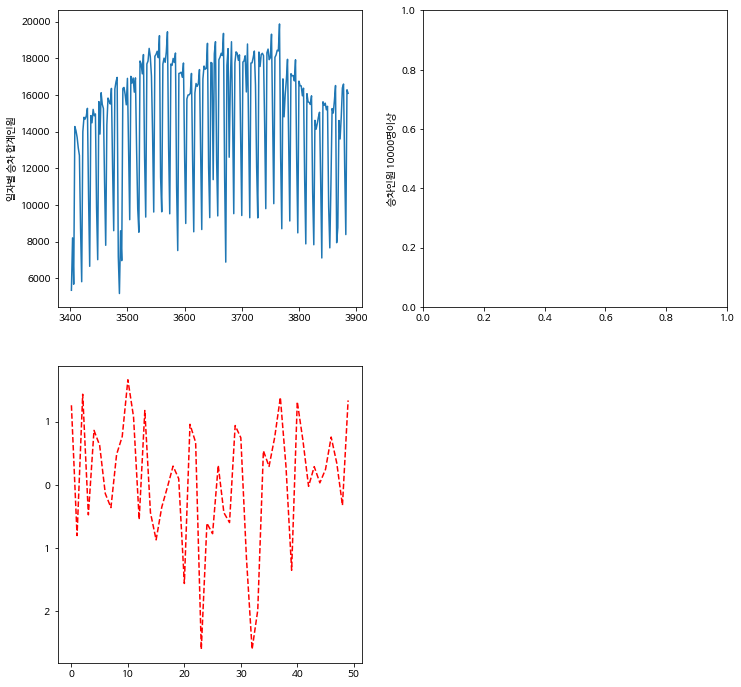

In [27]:
# 참조 문서 https://matplotlib.org/stable/tutorials/index.html, https://wikidocs.net/92081 ,https://wikidocs.net/141537

#하단역 승하차 데이터를 df_hadan에 새로 저장
df_hadan=df.loc[df['역번호']==102]

#일자별 승차 합계인원으로 df_hadan에 한번 더 필터링한 값을 저장
df_hadan=df_hadan.loc[df['구분']=='승차']

print(df_hadan)

#디버깅용 
# print(df_hadan[['년월일']])
# print(df_hadan[['합계']])

#y축 설정
y_axis=df_hadan[['합계']]

#x축은 설정하였으나 그래프의 나타내기 실패 
x_axis=df_hadan[['년월일']]

#기본그래프 설정
fig= plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1,ylabel='일자별 승차 합계인원')
ax2 = fig.add_subplot(2,2,2,ylabel='승차인원 10000명이상')
ax3 = fig.add_subplot(2,2,3)

#ax1에 그리기
# ax1.plot(x_axis,y_axis) #실패 TypeError: unhashable type: 'numpy.ndarray' 
ax1.plot(y_axis)
x = np.arange(50)
y = np.random.randn(50)
ax3.plot(x, y, 'r--')



## ■ 문제 2-5 특정 조건에 따른 승,하차 그래프 만들기
df_hadan 으로부터, **승차 인원이 10000명 이상인** 데이터만 추출하여 그래프 생성하기


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


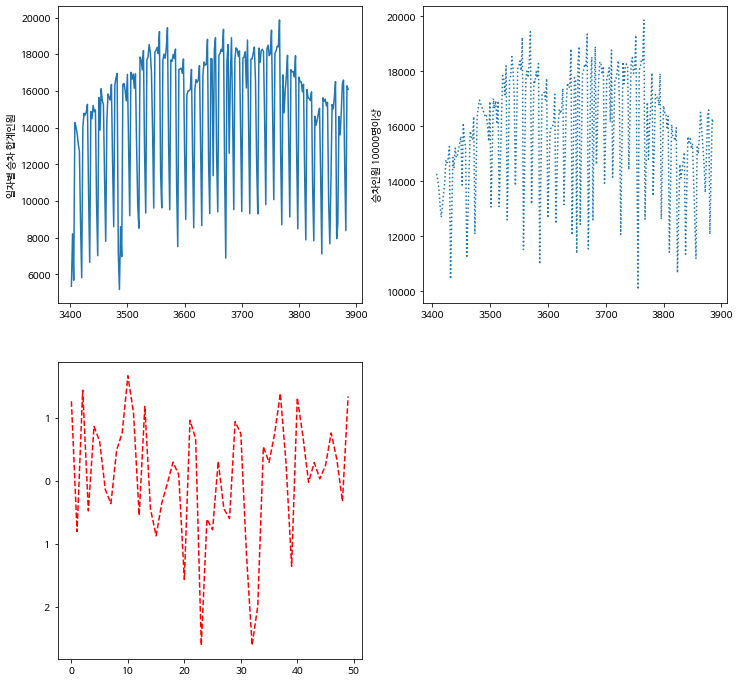

In [28]:
#df_hadan 설정 
df_hadan=df.loc[df['역번호']==102]
df_hadan=df_hadan.loc[df_hadan['구분']=='승차']

cond_A = (df_hadan['합계'] >= 10000)
df_hadan_ride=df_hadan.loc[cond_A]
df_hadan_ride
y_axis=df_hadan_ride[['합계']]
#그래프 그리기 ax2에 그린다.

ax2.plot(y_axis,linestyle='dotted')

fig

**iloc를** 사용하여 첫번째 행과 01시-02시 데이터부터 24시-01시 데이터까지가져오자
```
df.iloc[start_row:end_row, start_col:end_col]
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [29]:
df_hadan=df.loc[df['역번호']==102]
df_hadan0 = df_hadan.iloc[:2, 5:29]
df_hadan0

,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
3402,0,0,0,14,44,129,156,226,258,251,292,356,449,403,459,489,479,336,292,284,268,124,36,6
3403,0,0,0,2,20,147,166,236,230,241,297,315,332,376,429,438,469,402,251,231,252,140,82,23


## ■ 문제 2-6. Column과 Rows 값을 서로 변경하시오
Transpose 메소드를 사용하여 column에 있는 데이터를 행의 값으로 변환합니다

In [30]:
## your code here..
df_hadan_transpose=df_hadan0.transpose()
df_hadan_transpose

,3402,3403
01시-02시,0,0
02시-03시,0,0
03시-04시,0,0
04시-05시,14,2
05시-06시,44,20
06시-07시,129,147
07시-08시,156,166
08시-09시,226,236
09시-10시,258,230
10시-11시,251,241


## ■ 문제 2-7. 그래프의 스타일 속성을 지정하시오
df_hadan_transpose 를 막대(bar) 그래프 차트를 사용하여 그리시오 그래프에 대한 x축 레이블(label)은 '시간대'로 y축 레이블은 승하차 인원, 제목(title)은 '시간대별 승하차 인원'으로 작성하시오

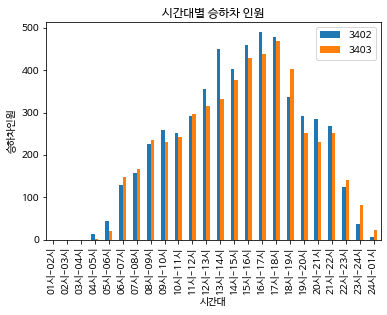

In [31]:
ax = df_hadan_transpose.plot.bar(xlabel='시간대',ylabel='승하차인원', title='시간대별 승하차 인원')

다음과 같이 이미지 파일로 내보내기가 가능하다


```
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
```

In [32]:

plt.savefig("bar_chart.png")

<Figure size 432x288 with 0 Axes>

# HW3. 데이터에 집합(Set)연산 적용하기 및 구글 드라이브와 연동하기
- 주어진 데이터셋들간에 교집합,차집합,합집합 연산을 적용해보기
- 구글 드라이브와 연동하여 파일을 쉽게 읽을 수 있도록 하기
- 구글드라이브로 공유된 파일들을 쉽게 사용하도록 하기# 새 섹션

## ■ 문제 3-1 구글 드라이브에서 기존의 csv 파일 불러오기 및 상위 10개 출력
자신의 구글드라이브에 아래 파일을 업로드한 뒤에, csv파일 데이터셋 불러오기를 수행하시오.
부산교통공사_시간대별 승하차인원_20210801.csv


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
path_dataset = "/content/drive/MyDrive/"
filename= "부산교통공사_시간대별 승하차인원_20210801.csv"

In [35]:
cd /content/drive/


/content/drive


In [36]:
my_df = pd.read_csv(path_dataset + filename,encoding='cp949')
my_df.head(10)

,역번호,역명,년월일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2021-01-01,승차,2323,0,0,1,4,24,42,101,122,94,109,148,143,163,229,308,272,237,132,59,53,55,20,7,0
1,95,다대포해수욕장,2021-01-01,하차,2010,0,0,1,1,26,88,112,54,66,99,123,136,226,248,199,160,158,76,71,41,57,34,21,13
2,95,다대포해수욕장,2021-01-02,승차,2901,0,0,0,4,34,43,79,139,173,173,197,207,249,296,386,288,264,123,72,83,64,26,1,0
3,95,다대포해수욕장,2021-01-02,하차,2363,0,0,0,0,14,48,61,78,73,129,206,209,222,265,264,223,165,104,62,78,81,48,20,13
4,95,다대포해수욕장,2021-01-03,승차,2268,0,0,2,5,22,43,49,104,125,117,157,154,198,249,337,239,182,91,63,57,43,25,6,0
5,95,다대포해수욕장,2021-01-03,하차,1914,0,0,2,0,18,25,38,61,71,122,171,126,229,244,173,141,133,95,73,65,65,32,21,9
6,95,다대포해수욕장,2021-01-04,승차,3527,0,0,0,11,52,122,304,357,214,239,198,244,265,322,313,254,222,169,78,59,57,41,6,0
7,95,다대포해수욕장,2021-01-04,하차,2767,0,0,0,1,13,65,116,146,110,99,158,204,292,224,221,192,183,267,183,102,105,55,21,10
8,95,다대포해수욕장,2021-01-05,승차,3421,0,1,1,13,55,129,316,346,198,219,222,251,246,296,260,245,205,161,76,81,49,42,9,0
9,95,다대포해수욕장,2021-01-05,하차,2689,2,1,0,2,22,75,105,153,96,125,168,197,186,226,192,197,201,239,177,98,115,63,27,22


## ■ 문제 3-2. 구글드라이브 파일 공유하고 해당 파일을 읽어오기
구글 드라이브 내 URL 기반 공유를 수행하고 해당 파일을 정상적으로 다운로드되는지 확인할
구글드라이브 id를 찾아서 아래 코드에 대입하여 실행시키시기 바랍니다

예) 공유된 폴더 링크가 다음과 같다면 https://drive.google.com/drive/folders/1-EJr-anFISoVb96QYedLx5PklEtm9JSS?usp=sharing
id는 1-EJr-anFISoVb96QYedLx5PklEtm9JSS 가 됩니다

https://drive.google.com/drive/folders/1k71RY6hTtXuzKJF2yhzEF3IEdBfI7Kfl?usp=sharing


In [37]:
# pyDrive 설치
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [38]:
id='1k71RY6hTtXuzKJF2yhzEF3IEdBfI7Kfl'
file_list = drive.ListFile({'q': f"'{id}' in parents and trashed=false"}).GetList()

In [39]:
cd /content

/content


In [40]:
# 공유된 파일리스트 확인하고 데이터를 다운로드 받습니다.
for file in file_list:
    downloaded = drive.CreateFile({'id': file['id']})
    downloaded.GetContentFile(file['title'])
    print(file['title'])
    

부산교통공사_시간대별 승하차인원_20210801.csv


In [41]:
P = my_df.loc[my_df['08시-09시'] > 1000]
S = my_df.loc[my_df['17시-18시'] > 1000]
print( P.shape[0] , S.shape[0] )

8263 6500


## ■ 문제 3-3. UNION 연산 수행하기
P 와 S의 UNION에 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
union 연산을 수행한 결과는 11150이 되어야한다

```
https://pandas.pydata.org/docs/reference/api/pandas.concat.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
https://www.w3schools.com/python/ref_set_union.asp
```

In [42]:
P = my_df.loc[my_df['08시-09시'] > 1000]
S = my_df.loc[my_df['17시-18시'] > 1000]
result=pd.concat([P,S])   #concat으로 두개의 데이터를 합친다
final_result=result.drop_duplicates() #그 중 중복인 것을 없앤다  # 이 두가지 자체가 union연산
final_result.shape[0]

11150

## ■ 문제 3-4. INTERSECTION 연산 수행하기
P 와 S의 INTERSECTION 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Intersection 연산을 수행한 결과는 3613이 되어야한다

```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
https://www.w3schools.com/python/ref_set_intersection.asp
```

In [43]:
P = my_df.loc[my_df['08시-09시'] > 1000]
S = my_df.loc[my_df['17시-18시'] > 1000]
result=pd.concat([P,S])
f=result[result.duplicated()]  #<- df[df.[]]
f.shape[0]

3613

## ■ 문제 3-5. DIFFERENCE 연산 수행하기
P 와 S의 DIFFERENCE 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Difference 연산을 수행한 결과는 각각 4650, 2887 이되어야한다

```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html
https://www.w3schools.com/python/ref_set_difference.asp
```

In [44]:
#1번 방법으로 푸는 아이디어
# 합집합구하고
# 그중 P가 포함되어있는 것을 제외하고 인덱싱  False값들을 저장
# 이렇게 되면 순수S만 남는다.
# my_df=my_df[['08시-09시','17시-18시']]
# P = my_df.loc[my_df['08시-09시'] > 1000]
# S = my_df.loc[my_df['17시-18시'] > 1000]
# result=pd.concat([P,S])
# union=result.drop_duplicates() 
# P_Diffrence=union[union.isin(P)]
# A=P_Diffrence.dropna(axis=0)
# A.drop_duplicates()
# A



In [45]:
#2번의 방법으로는 성공
P = my_df.loc[my_df['08시-09시'] > 1000]
S = my_df.loc[my_df['17시-18시'] > 1000]

P=P.values.tolist()
S=S.values.tolist()
P_set=set(tuple(row) for row in P)
S_set=set(tuple(row) for row in S)
result=P_set.difference(S_set)
print(len(result))
result2=S_set.difference(P_set)
print(len(result2))

4650
2887


## ■ 문제 3-6. isSubset 함수 만들기
만약 데이터프레임 dfA, dfB가 주어질 때,
dfA가 dfB의 서브셋이고, dfA가 dfB의 서브셋이라면(동치=equivalence) return True
만약 dfA가 dfB의 서브셋이고 그 반대는 성립하지 않는 경우에도 return True
그 외(서로의 서브셋이 아닌 경우, dfB가 dfA의 서브셋이지만 그 반대는 성립하지 않는 경우)는 return False
을 반환하는 함수를 작성하여라

In [46]:


def isSubset(dfA, dfB):
   dfA_set=set(tuple(row) for row in dfA)
   dfB_set=set(tuple(row) for row in dfB)
   if (dfA_set.issubset(dfB_set) and dfB_set.issubset(dfA_set)): #동치인경우
      return True
   elif dfA_set.issubset(dfB_set) and not dfB_set.issubset(dfA_set): #dfA가 dfB의 서브셋이고 그반대는 성립하지 않는경우
      return True
   elif dfB_set.issubset(dfA_set) and not dfA_set.issubset(dfB_set): #dfB가 dfA의 서브셋이지만 그반대는 성립하지않는 경우
     return False
   else: #그외 (서로가 서브셋이 아닌경우)
     return False
intersect_commute=f
P_only=result

print(isSubset(P,intersect_commute))# == isSubset(P, intersect_commute)
print(isSubset(P,P)) 
print(isSubset(P,S)) 
print(isSubset(P,P_only))# == isSubset(P, P_only)

# isSubset(P, intersect_commute)
# isSubset(P, P)
# isSubset(P, S)
# isSubset(P, P_only)

False
True
False
False
